<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Reinforcement Learning for Finance

**Chapter 08 &mdash; Dynamic Asset Allocation (Three Asset Case)**

&copy; Dr. Yves J. Hilpisch

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@tpq.io">team@tpq.io</a>

In [1]:
from dqlagent import *
from assetallocation import *
%run assetallocation.py

In [2]:
days = 2 * 252

In [3]:
random.seed(100)

In [4]:
# 1 = X, 2 = Y, 3 = Z
investing = Investing('.SPX', '.VIX', 'XAU=', steps=days)
test = 1

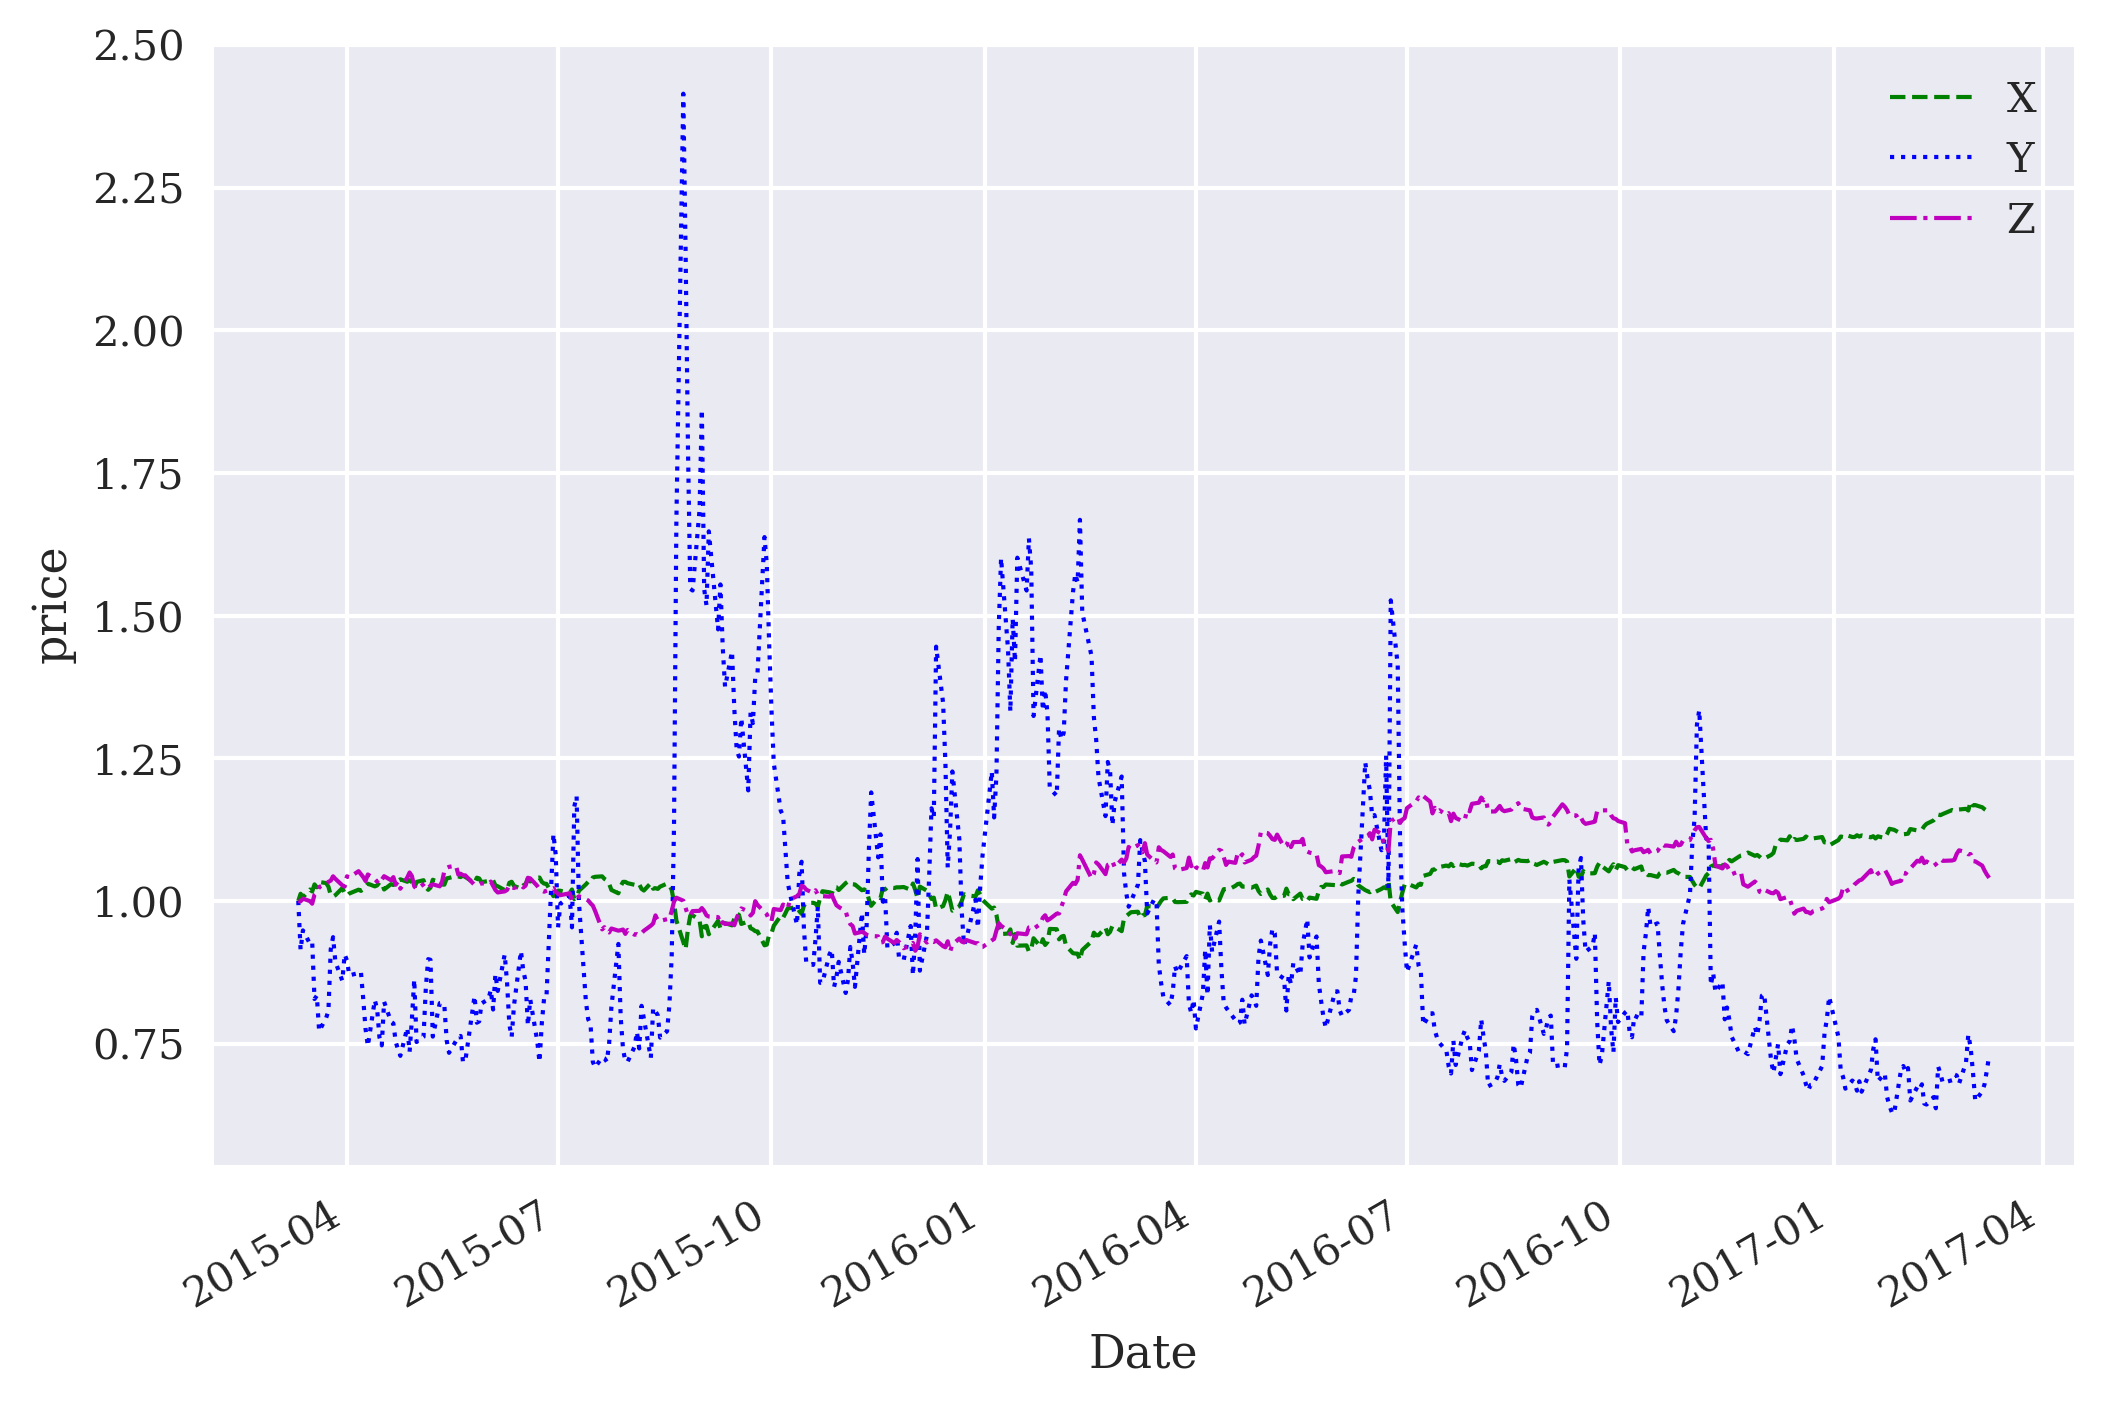

In [5]:
investing.data.plot(lw=1, style=['g--', 'b:', 'm-.'])
plt.ylabel('price');

In [6]:
random.seed(100)
np.random.seed(100)
tf.random.set_seed(100)

In [7]:
agent = DQLAgent('3AC', feature=None, n_features=6, env=investing, hu=128, lr=0.00025)

In [8]:
episodes = 8#64

In [ ]:
%time agent.learn(episodes)

In [9]:
agent.epsilon

1.0

In [10]:
agent.env.portfolios = pd.DataFrame()

In [11]:
%time agent.test(10)

AttributeError: 'Investing' object has no attribute 'min_accuracy'

In [12]:
agent.env.portfolios.groupby('e')[
    ['xt', 'yt', 'zt']].mean().mean()

KeyError: 'e'

In [14]:
agent.env.portfolios.groupby('e')[
    ['Xt', 'Yt', 'Zt', 'pv']].last().mean()

Xt    1.184271
Yt    1.303997
Zt    1.219622
pv    2.927294
dtype: float64

In [15]:
def get_r(n):
    r = agent.env.portfolios[
        agent.env.portfolios['e'] == n
        ].set_index('date')
    return r

In [16]:
n = min(agent.env.portfolios['e']) + 1
n

66

In [17]:
r = get_r(n)

In [18]:
r[['xt', 'yt', 'zt']].mean()

xt    0.518429
yt    0.375992
zt    0.105579
dtype: float64

In [19]:
r[['xt', 'yt', 'zt']].std()

xt    0.089908
yt    0.127021
zt    0.147788
dtype: float64

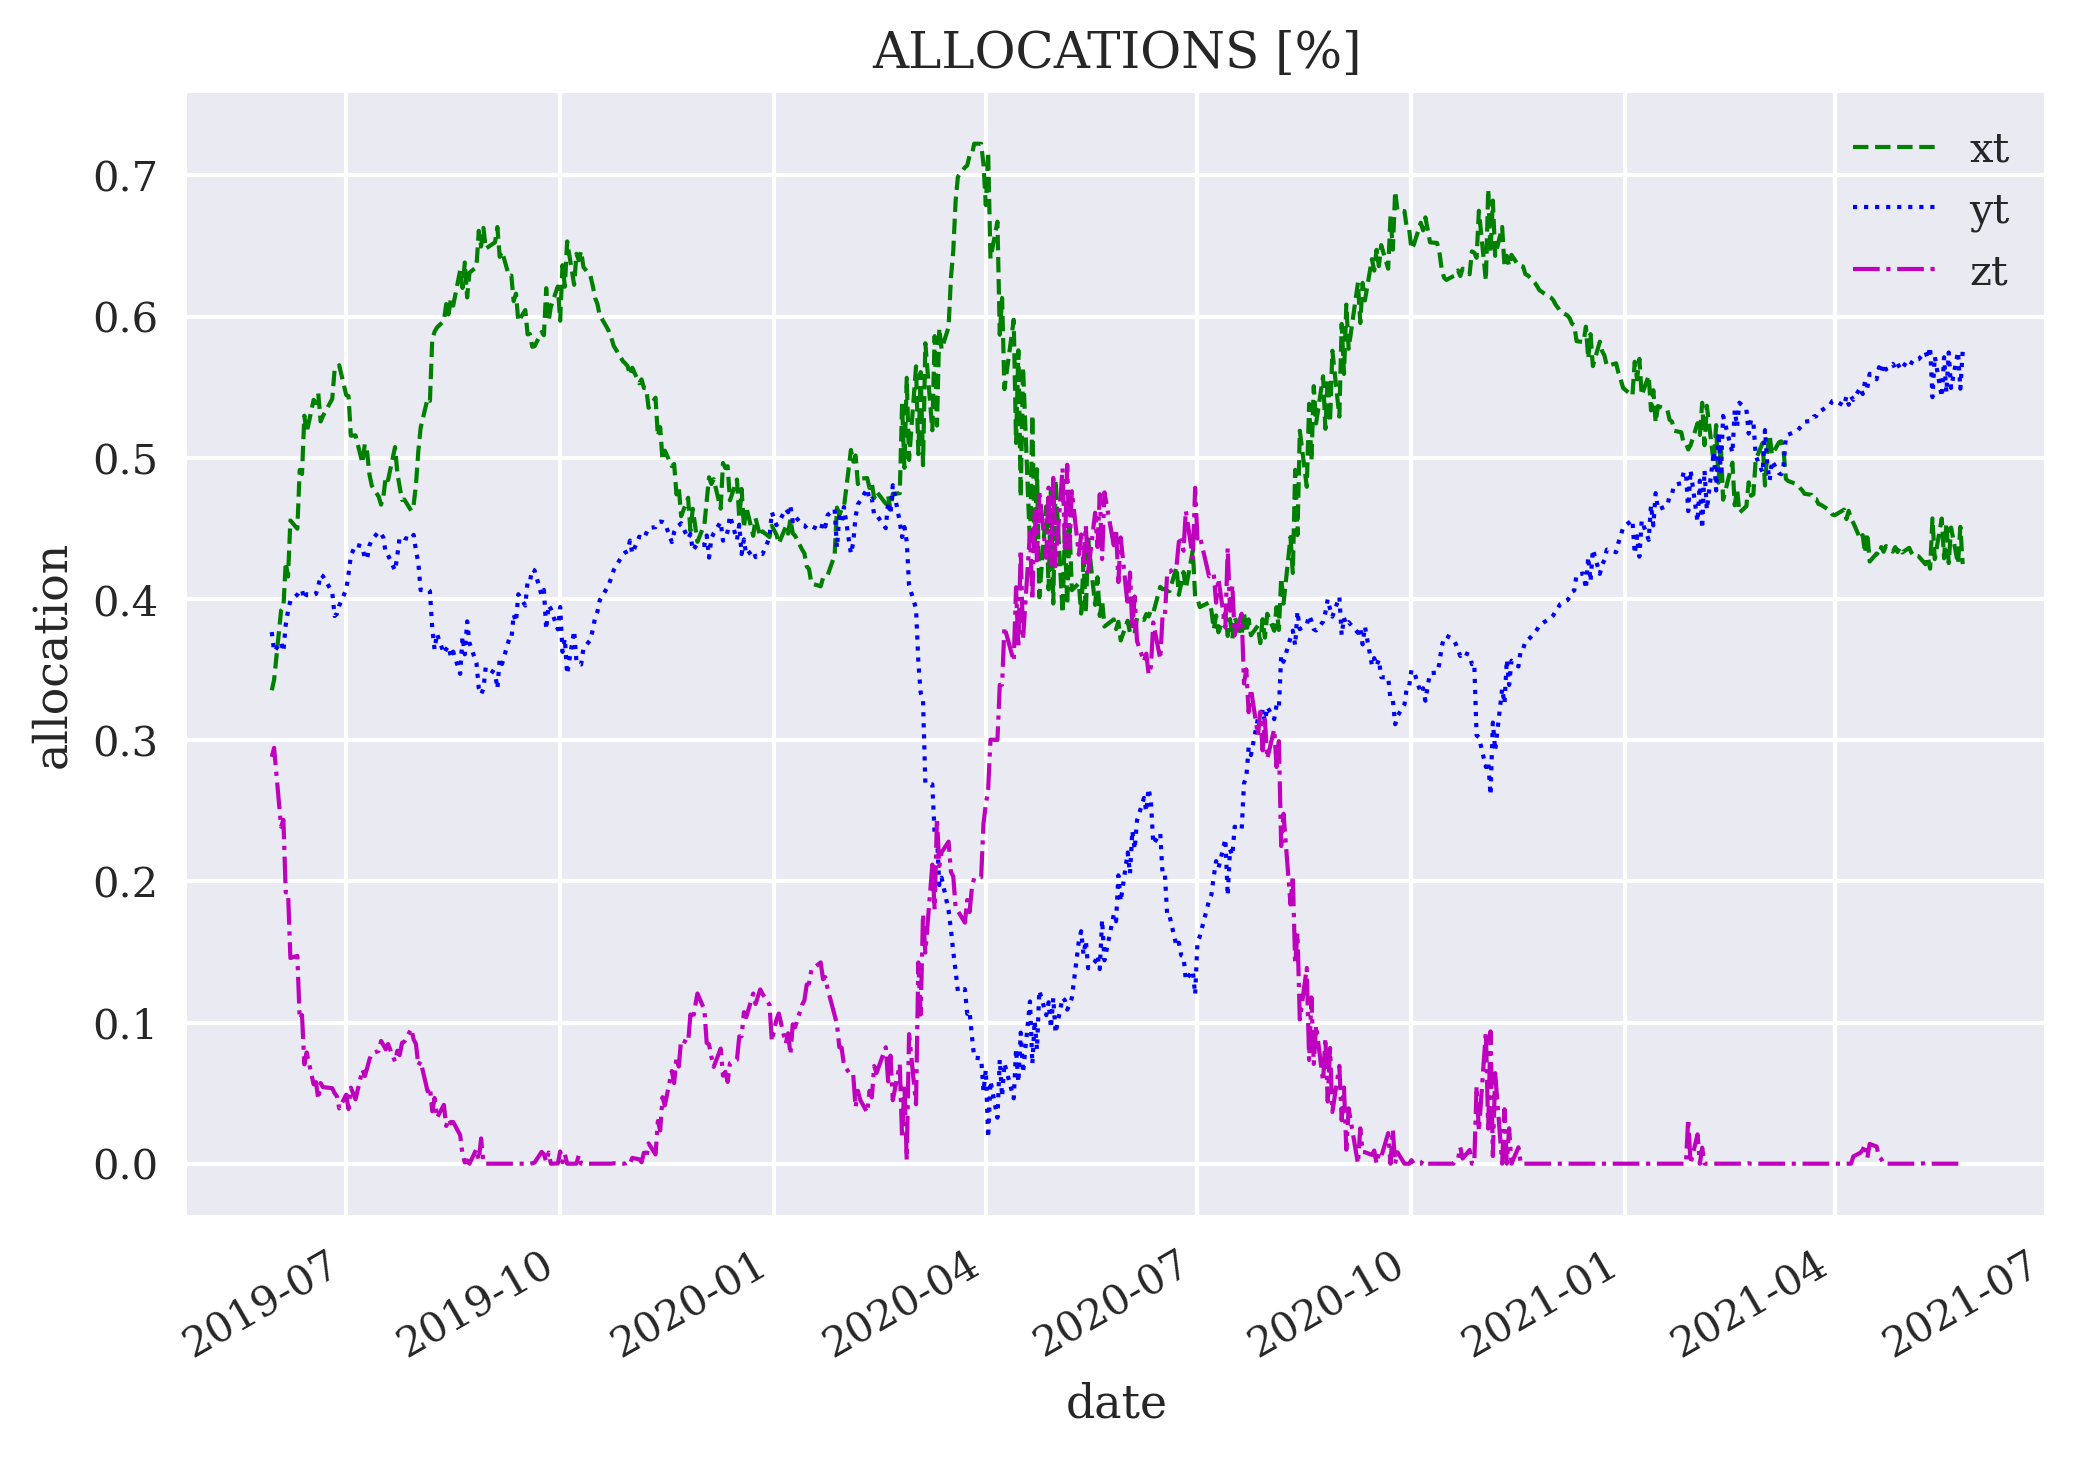

In [20]:
r[['xt', 'yt', 'zt']].plot(
    title='ALLOCATIONS [%]',
    style=['g--', 'b:', 'm-.'],
    lw=1, grid=True)
plt.ylabel('allocation');

In [21]:
cols = ['Xt', 'Yt', 'Zt', 'pv']

In [22]:
sub = r[cols]

In [23]:
rets = sub.iloc[-1] / sub.iloc[0] - 1
rets

Xt    0.504887
Yt    0.052514
Zt    0.484728
pv    2.670451
dtype: float64

In [24]:
stds = sub.pct_change().std() * math.sqrt(252)
stds

Xt    0.261492
Yt    1.475499
Zt    0.167226
pv    0.529418
dtype: float64

In [25]:
rets / stds

Xt    1.930792
Yt    0.035591
Zt    2.898632
pv    5.044123
dtype: float64

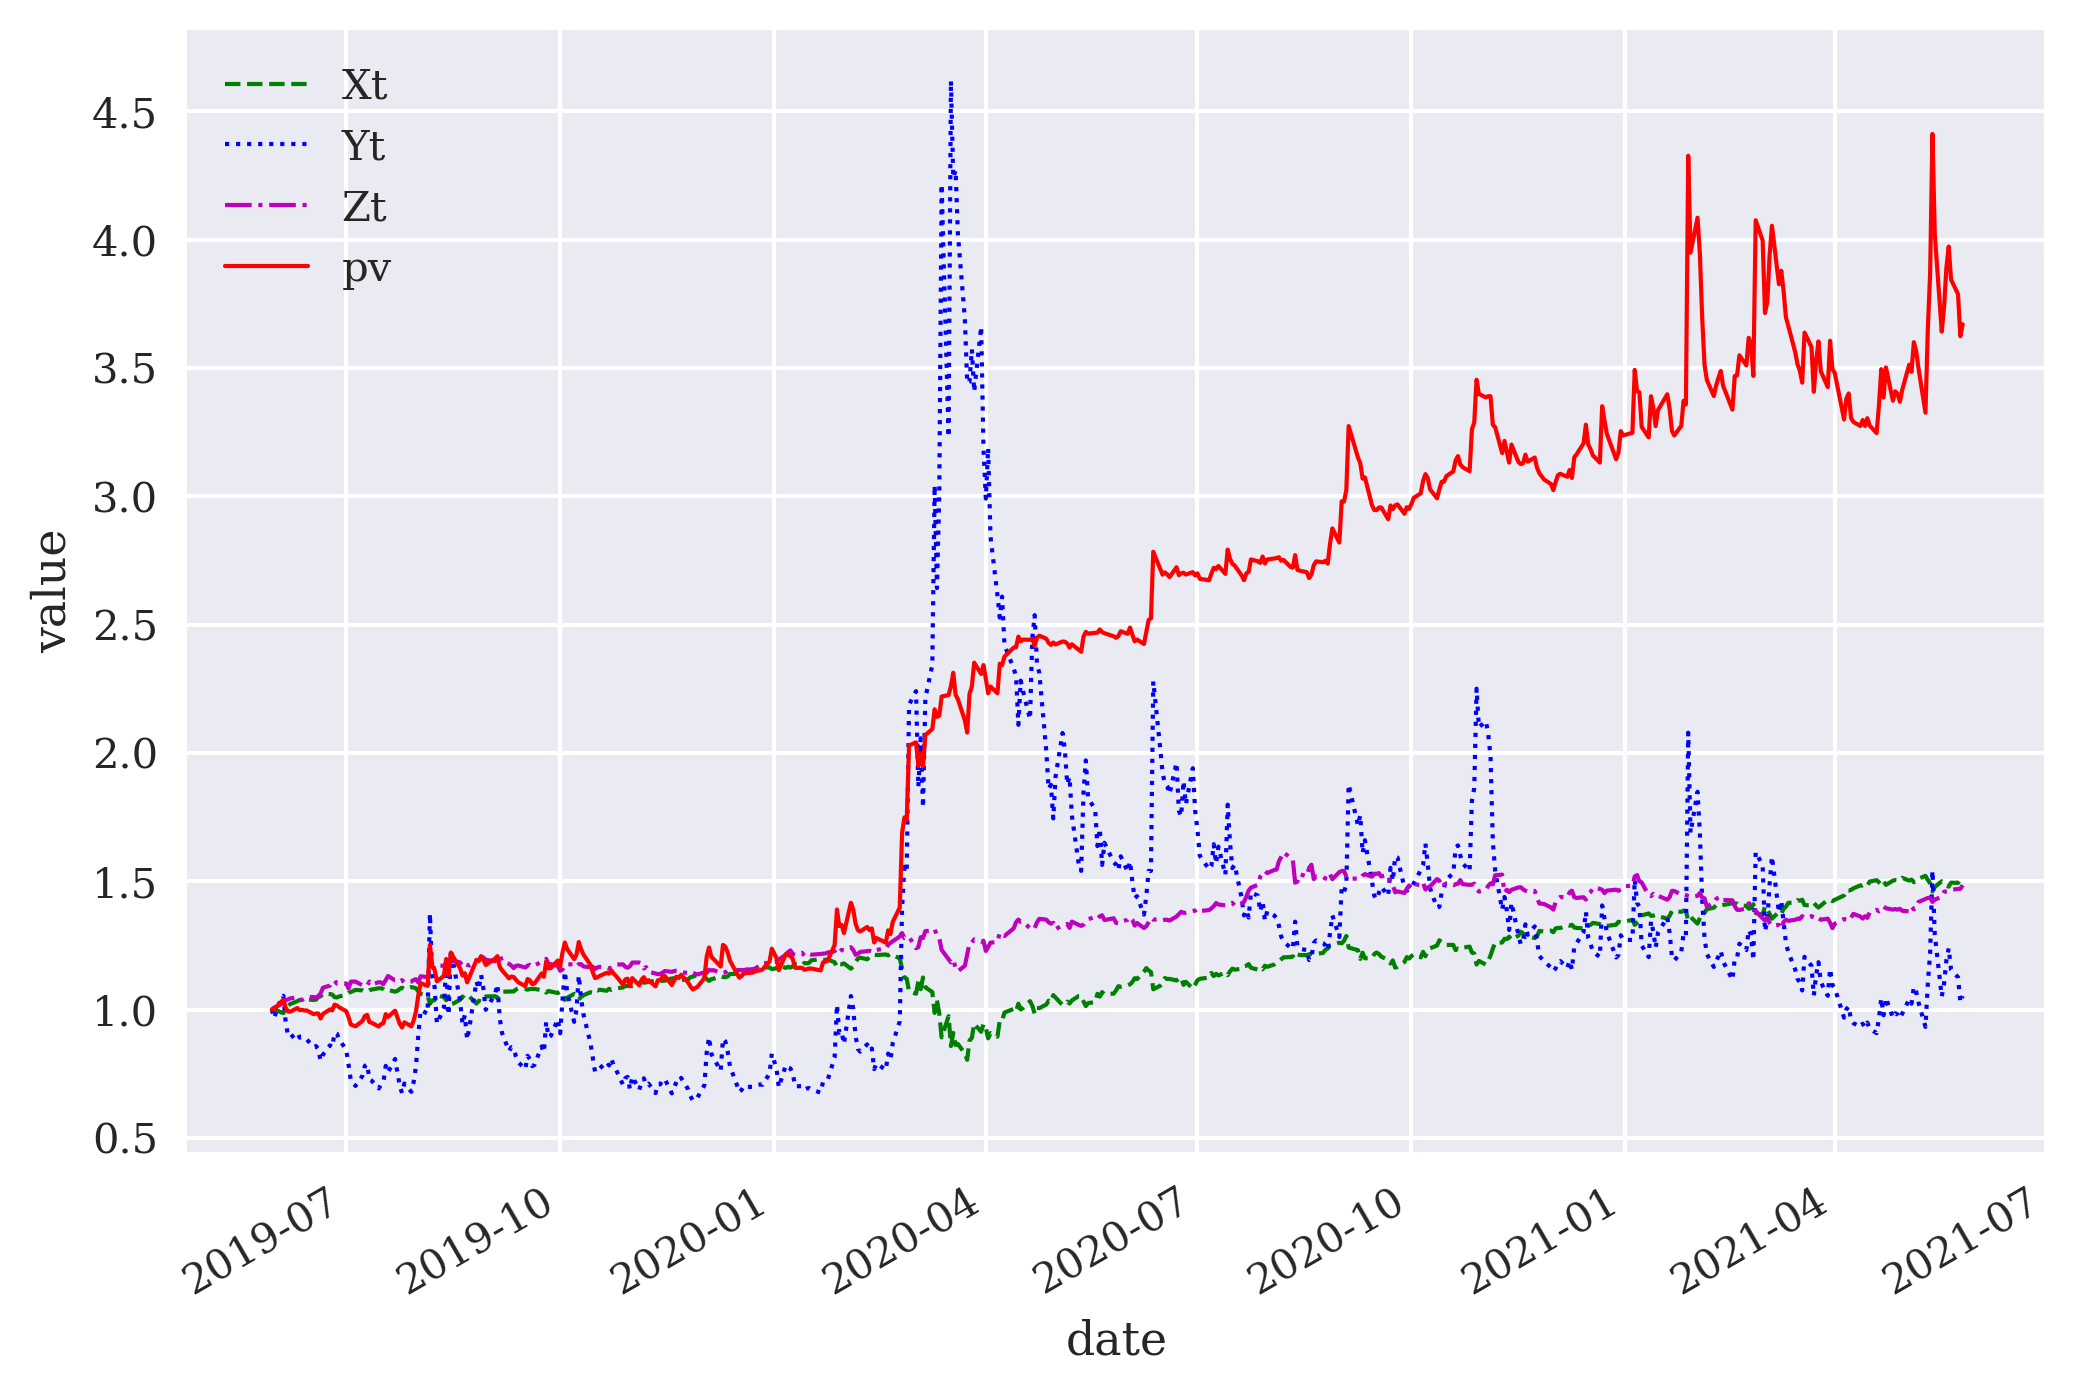

In [26]:
sub.plot(style=['g--', 'b:', 'm-.', 'r-'], lw=1)
plt.ylabel('value');


In [27]:
sharpe = pd.DataFrame()

In [28]:
def calculate_sr():
    for n in set(investing.portfolios['e']):
        r = get_r(n)
        sub = r[cols]
        rets = sub.iloc[-1] / sub.iloc[0] - 1
        stds = sub.pct_change().std() * math.sqrt(252)
        sharpe[n] = rets / stds

In [29]:
calculate_sr()

In [30]:
sharpe.round(2)

,65,66,67,68,69,70,71,72,73,74
Xt,1.69,1.93,-0.01,0.41,0.16,1.34,0.30,1.31,1.52,0.53
Yt,0.29,0.04,-0.13,-0.05,-0.14,0.31,0.76,-0.11,0.21,0.80
Zt,2.78,2.90,0.86,-0.21,0.51,0.71,2.13,1.12,1.19,3.24
pv,6.55,5.04,2.08,1.11,2.32,3.67,7.09,2.80,3.76,7.84


In [31]:
sharpe.mean(axis=1)

Xt    0.917560
Yt    0.197753
Zt    1.523657
pv    4.225037
dtype: float64

In [32]:
((sharpe.loc['pv'] > sharpe.loc['Xt']) &
 (sharpe.loc['pv'] > sharpe.loc['Yt']) &
 (sharpe.loc['pv'] > sharpe.loc['Zt'])).value_counts()

True    10
Name: count, dtype: int64

## Equally Weighted Portfolio

In [33]:
agent.opt_action = lambda state: np.ones(3) / 3

In [34]:
agent.env.portfolios = pd.DataFrame()

In [35]:
%time agent.test(10)

episode=10 | total reward=4.75
CPU times: user 2.87 s, sys: 94.8 ms, total: 2.96 s
Wall time: 19.2 s


In [36]:
sharpe = pd.DataFrame()

In [37]:
calculate_sr()

In [38]:
sharpe.round(2)

,75,76,77,78,79,80,81,82,83,84
Xt,1.35,0.41,2.73,1.10,0.38,3.46,1.35,0.81,0.61,1.84
Yt,0.06,0.20,-0.08,0.62,-0.02,-0.18,0.06,-0.05,0.75,-0.16
Zt,1.23,-0.44,0.37,1.52,-0.16,-0.87,1.23,-0.72,4.86,1.30
pv,1.67,1.52,1.32,2.52,1.25,0.96,1.67,1.27,3.77,1.76


In [39]:
sharpe.mean(axis=1)

Xt    1.402960
Yt    0.121449
Zt    0.830933
pv    1.769955
dtype: float64

In [40]:
((sharpe.loc['pv'] > sharpe.loc['Xt']) &
 (sharpe.loc['pv'] > sharpe.loc['Yt']) &
 (sharpe.loc['pv'] > sharpe.loc['Zt'])).value_counts()

True     6
False    4
Name: count, dtype: int64

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@tpq.io">team@tpq.io</a>